In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import seaborn as sns

C:\Users\Bruker\AppData\Local\Temp\ipykernel_19492\1715770120.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
#Load data
df=pd.read_csv('B22_3p5mgmL_20-90C_DEpsilon.txt', sep='\t')

#Find temperatures and wavelengths
temperatures = df[df.columns[0]].values
wavelengths = []
for c in df.columns[1:-1]:
    wavelengths.append(float(c))


56.0


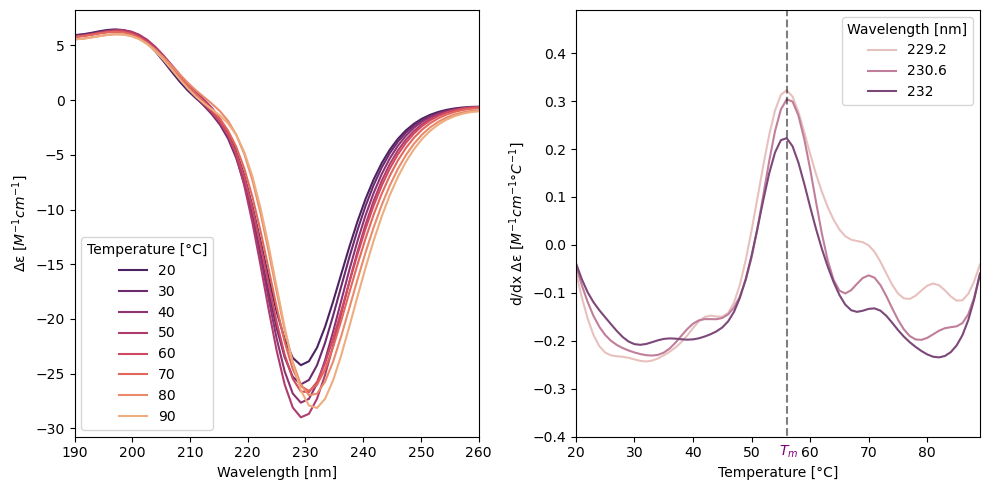

In [24]:
#Ellipticity as function of wavelength
cmap=sns.color_palette("flare", as_cmap=True).reversed()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(0,df.shape[0], 10):
    data = df.loc[i].values
    temp = data[0]
    y = data[1:-1]
    y_smooth = gaussian_filter(y, sigma=3)
    num_temps=df.shape[0]
    color=cmap(i/(num_temps))
    axs[0].plot(wavelengths, y_smooth, label=int(temp), color=color)
    

#d/dx ellipticity as function of temperature
Tm_list=[]
cmap=sns.color_palette("rocket", as_cmap=True)
cmap=sns.cubehelix_palette(light=0.8, as_cmap=True)
#cmap=sns.cubehelix_palette(start=10, rot=-1, light=0.8, as_cmap=True)
for index, c in enumerate(['229.2', '230.6', '232']):
    measured_y = df[c].values
    smooth_y = gaussian_filter(measured_y, sigma=3)
    color=cmap(index/3)
    axs[1].plot(temperatures[:-1], np.diff(smooth_y), label=c, color=color)
    max_index=np.argmax(np.diff(smooth_y))
    max=temperatures[max_index]
    Tm_list.append(max)


axs[0].set_ylabel('Δε [$M^{-1} cm^{-1}$]')
axs[0].set_xlabel("Wavelength [nm]")
axs[0].set_xlim(190, 260)
axs[0].legend(title='Temperature [°C]')
#axs[0].axhline(y=0, color="black", linewidth=1)


Tm=np.mean(Tm_list)
print(Tm)
axs[1].vlines(Tm, -0.8, 0.8, colors='k', linestyles='dashed', alpha=0.5)
axs[1].text(Tm-1.3, -0.44, '$T_m$', color='purple')
axs[1].set_ylim(-0.4, 0.49)
axs[1].set_ylabel("d/dx Δε [$M^{-1} cm^{-1} °C^{-1}$]")
axs[1].set_xlabel("Temperature [°C]")
axs[1].set_xlim(20, 89)
axs[1].legend(title='Wavelength [nm]')

plt.tight_layout()
plt.savefig("B22_CDtemp.png", bbox_inches="tight",pad_inches=0.3, dpi=300)
plt.show()